##Importando libs

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

##Gerando dados e plotando

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

##Aplicando o kmeans

In [3]:
#Importando o Kmeans
from sklearn.cluster import KMeans

#Configurando o algoritmos
kmeans = KMeans(n_clusters=4)

#Treinando o modelo
kmeans.fit(X)

#Predizendo dados
y_kmeans = kmeans.predict(X)

##Plotando o modelo

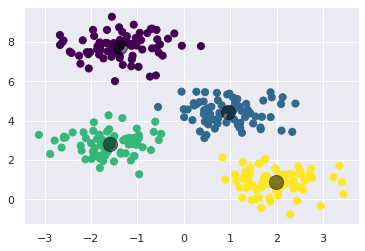

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

##Trabalhando com uma base real Base real - > load_digits

In [5]:
#Carregando base
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

##Criando o cluster

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)

#Treinando a base
clusters = kmeans.fit_predict(digits.data)

#O resultado são 10 clusters em 64 dimensões
kmeans.cluster_centers_.shape

(10, 64)

#Plot dos centros do clusters

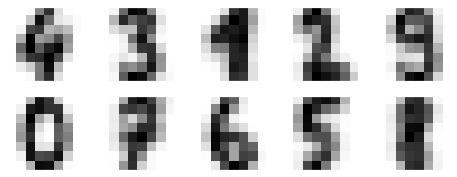

In [7]:
#Gerando subplots
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

#Coletandos os centros
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

#Plotando dados
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

#Vemos que mesmo sem os rótulos , KMeans é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, com talvez a exceção de 1 e 8.

#Como k -means não sabe nada sobre a identidade do cluster, os rótulos 0-9 podem ser permutados. Podemos corrigir isso combinando cada rótulo de cluster aprendido com os rótulos verdadeiros encontrados neles:

In [8]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

##Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

##Com apenas um algoritmo k-means simples, descobrimos o agrupamento correto para 80% dos dígitos de entrada! Vamos verificar a matriz de confusão para isso:

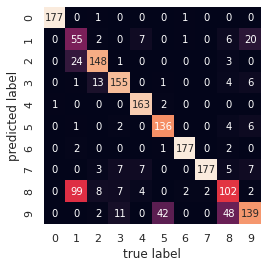

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');